In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [ ]:
# Normalize both training and test images
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [ ]:
# Define the model
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
# Use a learning rate scheduler instead of manually setting learning rate
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
adam = keras.optimizers.Adam(learning_rate=lr_scheduler)

In [ ]:
# Implement early stopping with patience
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Compile the model
modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Train the model with more epochs and early stopping
historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size=480,
                       epochs=50, validation_split=0.2,
                       callbacks=[early_stopping])

Epoch 1/50
100/100 [==============================] - 6s 46ms/step - loss: 0.8220 - accuracy: 0.7381 - val_loss: 0.4564 - val_accuracy: 0.8335
Epoch 2/50
100/100 [==============================] - 3s 28ms/step - loss: 0.4521 - accuracy: 0.8382 - val_loss: 0.3990 - val_accuracy: 0.8549
Epoch 3/50
100/100 [==============================] - 3s 30ms/step - loss: 0.4082 - accuracy: 0.8517 - val_loss: 0.3743 - val_accuracy: 0.8633
Epoch 4/50
100/100 [==============================] - 3s 33ms/step - loss: 0.3825 - accuracy: 0.8593 - val_loss: 0.3974 - val_accuracy: 0.8546
Epoch 5/50
100/100 [==============================] - 4s 40ms/step - loss: 0.3760 - accuracy: 0.8607 - val_loss: 0.3605 - val_accuracy: 0.8687
Epoch 6/50
100/100 [==============================] - 3s 32ms/step - loss: 0.3584 - accuracy: 0.8676 - val_loss: 0.3457 - val_accuracy: 0.8717
Epoch 7/50
100/100 [==============================] - 3s 30ms/step - loss: 0.3561 - accuracy: 0.8676 - val_loss: 0.3456 - val_accuracy: 0.8747

In [ ]:
# Evaluate the model on test data
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Test Loss:', perda_teste)
print('Test Accuracy:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8789
Test Loss: 0.3584578335285187
Test Accuracy: 0.8788999915122986


In [ ]:
# Save and load the model
modelo.save('modelo.keras')
modelo_salvo = keras.models.load_model('modelo.keras')

In [ ]:
# Make predictions
testes = modelo.predict(imagens_teste)
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


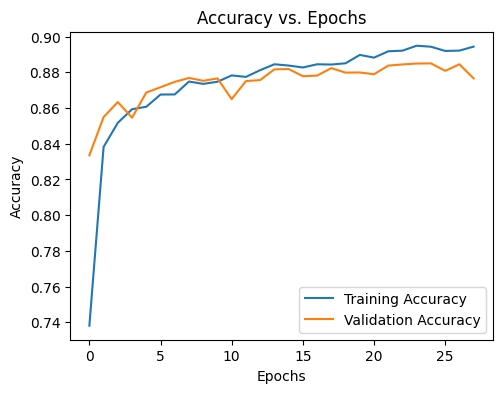

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Training Accuracy')
plt.plot(historico.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Training Loss')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

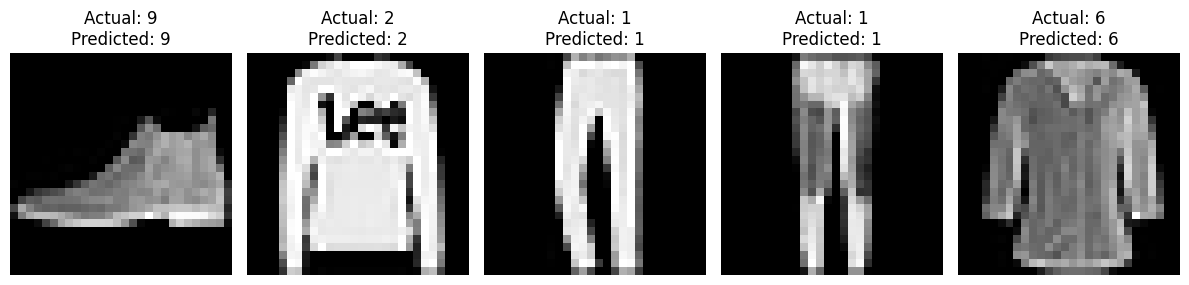

In [ ]:
# Plot predictions for a few test samples
num_samples_to_plot = 5
plt.figure(figsize=(12, 4))
for i in range(num_samples_to_plot):
    plt.subplot(1, num_samples_to_plot, i+1)
    plt.imshow(imagens_teste[i], cmap='gray')
    plt.title(f'Actual: {identificacoes_teste[i]}\nPredicted: {np.argmax(testes[i])}')
    plt.axis('off')

plt.tight_layout()

plt.show()